In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# feature extractoring and preprocessing data
import librosa as lr,librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import IPython.display as ipd
import glob
from IPython.display import Audio
import scipy

# Preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
#import keras

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Set directory for source files
file_dir = './drive/My Drive/Colab Notebooks/Voice Recognition/Baagunnaava/'
audio_files = glob.glob(file_dir+'/*.wav')
len(audio_files)

140

In [0]:
audio, freq = lr.load(audio_files[2])
freq

22050

In [0]:
glob('./drive/My Drive/')

In [0]:
samples3, sample_rate = librosa.load('./drive/My Drive/Colab Notebooks/Voice Recognition/Baagunnaava/2019-07-16-11-34-49-224_Nervous.wav',sr=16000)
samples3.resize(22050,)
samples3 = librosa.resample(samples3, sample_rate, 8000)
ipd.Audio(samples3,rate=8000)
samples3.resize(1,8000,1)
samples3.shape

(1, 8000, 1)

In [0]:
sample_rate

16000

In [0]:
Audio(data=audio, rate=freq)

 ### The rate at which a computer captures audio data is called the sampling frequency (often abbreviated fs) or sampling rate (often abbreviated sr)

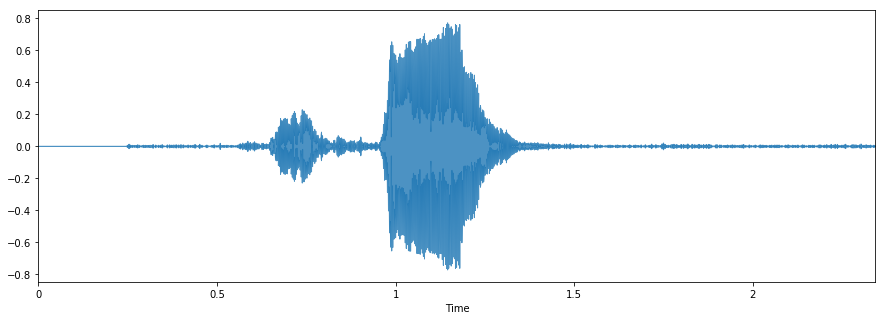

In [0]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(audio,freq,alpha=0.8)

## Pure Tone
### Let's synthesize a pure tone at 1047 Hz

In [0]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
print(len(t))
print(t)
x = 0.1*np.sin(2*np.pi*f0*t)
print(len(x))
print(x)
ipd.Audio(x, rate=sr)

44100
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.99986395e+00
 1.99990930e+00 1.99995465e+00]
44100
[ 0.          0.02939382  0.05619066 ... -0.07802299 -0.05619066
 -0.02939382]


(4096,)
(4096,)


Text(0.5, 0, 'Frequency (Hz)')

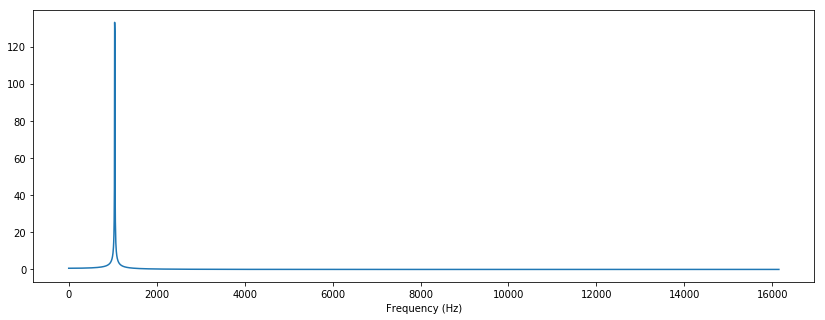

In [0]:
X = scipy.fft(x[:4096])
print(X.shape)
X_mag = np.absolute(X)    # spectral magnitude
print(X_mag.shape)
f = np.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:3000], X_mag[:3000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

# Understanding Audio featurea through Sonification
segment, feature extract, and analyze audio files. Goals:

- 1. Detect onsets in an audio signal.
- 2. Segment the audio signal at each onset.
- 3. Compute features for each segment.
- 4. Gain intuition into the features by listening to each segment separately.

In [0]:
x, sr = lr.load(audio_files[2])
x

array([0.        , 0.        , 0.        , ..., 0.00416109, 0.00421396,
       0.00612367], dtype=float32)

In [0]:
# Compute the Short time Fourier Transform
X = librosa.stft(x)
X

array([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
        -1.0419980e-01+0.0000000e+00j, -3.1351429e-01+0.0000000e+00j,
        -5.1429629e-01+0.0000000e+00j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
         1.9291615e-03-8.2019726e-03j,  7.7725552e-02-2.0045066e-01j,
         3.9070791e-01+8.1951340e-04j],
       [ 0.0000000e+00-0.0000000e+00j,  0.0000000e+00-0.0000000e+00j,
         0.0000000e+00-0.0000000e+00j, ...,
         3.4244798e-02-1.9334998e-02j,  6.0154259e-02-9.0201478e-03j,
        -3.8441932e-01-2.7187085e-03j],
       ...,
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
        -3.2908578e-05-6.5735964e-07j, -6.6708215e-04-4.6841551e-06j,
         1.3500118e-03-8.3036821e-06j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00

In [0]:
# For display purpose apply Log amplitude
Xmag = librosa.amplitude_to_db(X)
Xmag

array([[-36.83104  , -36.83104  , -36.83104  , ..., -19.642662 ,
        -10.074853 ,  -5.7757325],
       [-36.83104  , -36.83104  , -36.83104  , ..., -36.83104  ,
        -13.351538 ,  -8.162936 ],
       [-36.83104  , -36.83104  , -36.83104  , ..., -28.106365 ,
        -24.318104 ,  -8.3036785],
       ...,
       [-36.83104  , -36.83104  , -36.83104  , ..., -36.83104  ,
        -36.83104  , -36.83104  ],
       [-36.83104  , -36.83104  , -36.83104  , ..., -36.83104  ,
        -36.83104  , -36.83104  ],
       [-36.83104  , -36.83104  , -36.83104  , ..., -36.83104  ,
        -36.83104  , -36.83104  ]], dtype=float32)

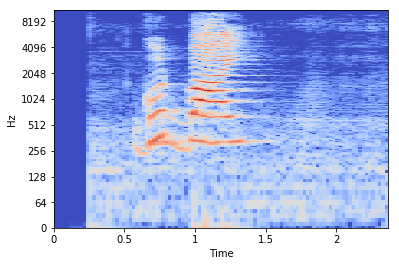

In [0]:
# Display Spectrogram
# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')

# 2. Detect Onsets

In [0]:
# Find the time, in seconds when onset occurs in audio signal
onset_frame = librosa.onset.onset_detect(x,sr=sr)
onset_frame

array([12, 29, 43])

In [0]:
onset_times = librosa.frames_to_time(onset_frame, sr=sr)
onset_times

array([0.27863946, 0.67337868, 0.99845805])

In [0]:
# Convert onset frames into sample indices
onset_samples = librosa.frames_to_samples(onset_frame)
onset_samples

array([ 6144, 14848, 22016])

### Play a 'beep' at each onset

In [0]:
# Use the `length` parameter so the click track is the same length as the original signal
clicks = librosa.clicks(times=onset_times, length=len(x))
clicks

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
ipd.Audio(x+clicks, rate=sr)

# 3. Audio Segmentation

### Save into an array, segments, 100-ms segments beginning at each onset

In [0]:
frame_sz = int(0.100*sr)
segments = np.array([x[i:i+frame_sz] for i in onset_samples])


- Here is a function that adds 300 ms of silence onto the end of each segment and concatenates them into one signal.

- Later, we will use this function to listen to each segment, perhaps sorted in a different order.

In [0]:
def concatenate_segments(segments, sr=22050, pad_time=0.100):
    padded_segments = [np.concatenate([segment, np.zeros(int(pad_time*sr))]) for segment in segments]
    return np.concatenate(padded_segments)

In [0]:
concatenated_signal = concatenate_segments(segments, sr)

In [0]:
# listen newly added signals
ipd.Audio(concatenated_signal, rate=sr)

# 4. Extract Features

### Compute Zero cross rate for each segment

In [0]:
zcr = [sum(librosa.core.zero_crossings(segment)) for segment in segments]
print(zcr)

[205, 154, 263]


In [0]:
ind = np.argsort(zcr)
print(ind)

[1 0 2]


In [0]:
# Sort the segments by zero crossing rate, and concatenate the sorted segments.
concatenated_signal = concatenate_segments(segments[ind],sr)
concatenated_signal

array([-0.13151845, -0.12706114, -0.10224041, ...,  0.        ,
        0.        ,  0.        ])

In [0]:
ipd.Audio(concatenated_signal,rate=sr)

## Repeat the steps above using other features from librosa.feature, e.g. rmse, spectral_centroid, spectral_bandwidth.



In [0]:
songname = './drive/My Drive/Colab Notebooks/Voice Recognition/AudioFiles/sample.wav'
y, sr = librosa.load(songname, mono=True, duration=5)

In [0]:
cmap = plt.get_cmap('inferno')
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
#plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [0]:
# Creating Audio Signal
import numpy as np
t = np.linspace(0, 5.0, int(5.0*22050))
a = 0.5*np.sin(2*np.pi*220*t)
print(a)
print(a.shape)
print(t.shape)


[ 0.00000000e+00  3.13244458e-02  6.25258260e-02 ... -6.25258260e-02
 -3.13244458e-02 -3.52351649e-14]
(110250,)
(110250,)


In [0]:
import IPython.display as ipd
ipd.Audio(a, rate=22050*2)

# Extracting features from Spectrogram
We will extract

- Mel-frequency cepstral coefficients (MFCC)(20 in number)
- Spectral Centroid,
- Zero Crossing Rate
- Chroma Frequencies
- Spectral Roll-off.

In [0]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [0]:
y, sr = librosa.load(audio_files[7], mono=True, duration=30)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [0]:
spec_cent.shape

(1, 142)

In [0]:
df = pd.DataFrame()
df['Chroma_stft'] = chroma_stft[0]
df['spec_cent'] = spec_cent[0]
df['spec_bw'] = spec_bw[0]
df['rolloff'] = rolloff[0]
df['zcr'] = zcr[0]
df['mfcc'] = mfcc[0]
df.tail()

,Chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc
137,0.564631,3809.439251,2656.744086,6578.393555,0.230957,-593.07119
138,0.633574,4417.086586,2804.678787,7568.920898,0.158691,-593.07119
139,0.000000,0.000000,0.000000,0.000000,0.000000,-593.07119
140,0.000000,0.000000,0.000000,0.000000,0.000000,-593.07119
141,0.000000,0.000000,0.000000,0.000000,0.000000,-593.07119


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
Chroma_stft    142 non-null float64
spec_cent      142 non-null float64
spec_bw        142 non-null float64
rolloff        142 non-null float64
zcr            142 non-null float64
mfcc           142 non-null float64
dtypes: float64(6)
memory usage: 6.7 KB


In [0]:
df = pd.DataFrame()
df['Chroma_stft'] = [chroma_stft.mean()]
df['spec_cent'] = [spec_cent[0].mean()]
df['spec_bw'] = [spec_bw[0].mean()]
df['rolloff'] = [rolloff[0].mean()]
df['zcr'] = [zcr[0].mean()]
df['mfcc'] = [mfcc[0].mean()]

In [0]:
df


,Chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc
0,0.341334,1711.399542,1452.44195,3239.533932,0.120409,-261.35046


In [0]:
x = df[:]

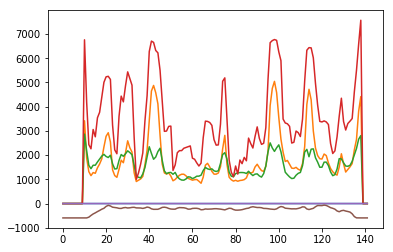

In [0]:
plt.plot(df)
plt.show()

In [0]:
to_append = '{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

In [0]:
to_append

'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'